# Homework 2 - Berkeley STAT 157

Handout 1/29/2019, due 2/5/2019 by 4pm in Git by committing to your repository.

In [3]:
from mxnet import nd, autograd, gluon
import numpy as np
import matplotlib.pyplot as plt


# 1. Multinomial Sampling

Implement a sampler from a discrete distribution from scratch, mimicking the function `mxnet.ndarray.random.multinomial`. Its arguments should be a vector of probabilities $p$. You can assume that the probabilities are normalized, i.e. tha they sum up to $1$. Make the call signature as follows:

```
samples = sampler(probs, shape) 

probs   : An ndarray vector of size n of nonnegative numbers summing up to 1
shape   : A list of dimensions for the output
samples : Samples from probs with shape matching shape
```

Hints:

1. Use `mxnet.ndarray.random.uniform` to get a sample from $U[0,1]$.
1. You can simplify things for `probs` by computing the cumulative sum over `probs`.

In [4]:
def sampler(probs, shape):
    cumsum = 0
    arr = [0]
    for i in range(len(probs)):
        cumsum = cumsum + probs[i]
        arr = np.append(arr, cumsum)
    sample = nd.random.uniform()
    def search(probs, samples):
        low = 0
        high = len(probs)-1
        mid = (low + high) // 2
        while not (probs[mid] <= sample and probs[mid + 1] > sample):
            if probs[mid] < sample:
                low = mid
            elif probs[mid] > sample:
                high = mid
            elif probs[mid] == sample:
                return mid
            mid = (low + high) // 2
        return mid
    ret = nd.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            sample = nd.random.uniform()
            ret[i, j] = search(arr, sample)
    return ret
# a simple test
sampler(nd.array([0.2, 0.3, 0.5]), (2,3))


[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

# 2. Central Limit Theorem

Let's explore the Central Limit Theorem when applied to text processing. 

* Download [https://www.gutenberg.org/ebooks/84](https://www.gutenberg.org/files/84/84-0.txt) from Project Gutenberg 
* Remove punctuation, uppercase / lowercase, and split the text up into individual tokens (words).
* For the words `a`, `and`, `the`, `i`, `is` compute their respective counts as the book progresses, i.e. 
    $$n_\mathrm{the}[i] = \sum_{j = 1}^i \{w_j = \mathrm{the}\}$$
* Plot the proportions $n_\mathrm{word}[i] / i$ over the document in one plot.
* Find an envelope of the shape $O(1/\sqrt{i})$ for each of these five words.
* Why can we **not** apply the Central Limit Theorem directly? 
* How would we have to change the text for it to apply? 
* Why does it still work quite well?

In [5]:
filename = gluon.utils.download('https://www.gutenberg.org/files/84/84-0.txt')

book = []
def clean(word):
    cleaned_word = ""
    for char in word:
        if char.isalpha():
            cleaned_word = cleaned_word + str(char)
    return cleaned_word.lower()

with open(filename) as f:
    for line in f:
        for word in line.split():
            cleaned_word = clean(word)
            if len(cleaned_word) > 0:
                book = np.append(book, cleaned_word)
            
print(book[0:100])    
## Add your codes here

['project' 'gutenbergs' 'frankenstein' 'by' 'mary' 'wollstonecraft'
 'godwin' 'shelley' 'this' 'ebook' 'is' 'for' 'the' 'use' 'of' 'anyone'
 'anywhere' 'at' 'no' 'cost' 'and' 'with' 'almost' 'no' 'restrictions'
 'whatsoever' 'you' 'may' 'copy' 'it' 'give' 'it' 'away' 'or' 'reuse' 'it'
 'under' 'the' 'terms' 'of' 'the' 'project' 'gutenberg' 'license'
 'included' 'with' 'this' 'ebook' 'or' 'online' 'at' 'wwwgutenbergnet'
 'title' 'frankenstein' 'or' 'the' 'modern' 'prometheus' 'author' 'mary'
 'wollstonecraft' 'godwin' 'shelley' 'release' 'date' 'june' 'ebook'
 'last' 'updated' 'january' 'language' 'english' 'character' 'set'
 'encoding' 'utf' 'start' 'of' 'this' 'project' 'gutenberg' 'ebook'
 'frankenstein' 'produced' 'by' 'judith' 'boss' 'christy' 'phillips'
 'lynn' 'hanninen' 'and' 'david' 'meltzer' 'html' 'version' 'by' 'al'
 'haines' 'further']


<BarContainer object of 5 artists>

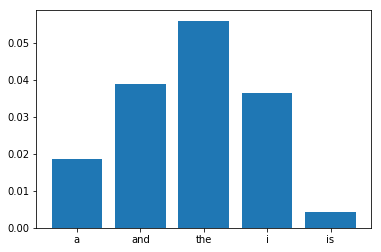

In [17]:
counts = dict({"a": 0, "and": 0, "the": 0, "i": 0, "is": 0})
for w in book:
    if w in counts:
        counts[w] = counts[w] + 1
for w in counts:
    counts[w] = counts[w] / len(book)
names = list(counts.keys())
values = list(counts.values())

plt.bar(names, values)

{'a': 1442, 'and': 3040, 'the': 4364, 'i': 2842, 'is': 333}


## 3. Denominator-layout notation

We used the numerator-layout notation for matrix calculus in class, now let's examine the denominator-layout notation.

Given $x, y\in\mathbb R$, $\mathbf x\in\mathbb R^n$ and $\mathbf y \in \mathbb R^m$, we have

$$
\frac{\partial y}{\partial \mathbf{x}}=\begin{bmatrix}
\frac{\partial y}{\partial x_1}\\
\frac{\partial y}{\partial x_2}\\
\vdots\\
\frac{\partial y}{\partial x_n}
\end{bmatrix},\quad 
\frac{\partial \mathbf y}{\partial {x}}=\begin{bmatrix}
\frac{\partial y_1}{\partial x}, 
\frac{\partial y_2}{\partial x}, 
\ldots,
\frac{\partial y_m}{\partial x}
\end{bmatrix}
$$

and 

$$
\frac{\partial \mathbf y}{\partial \mathbf{x}}
=\begin{bmatrix}
\frac{\partial \mathbf y}{\partial {x_1}}\\
\frac{\partial \mathbf y}{\partial {x_2}}\\
\vdots\\
\frac{\partial \mathbf y}{\partial {x_3}}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{\partial y_1}{\partial x_1}, 
\frac{\partial y_2}{\partial x_1},
\ldots,
\frac{\partial y_m}{\partial x_1}
\\ 
\frac{\partial y_1}{\partial x_2},
\frac{\partial y_2}{\partial x_2},
\ldots,
\frac{\partial y_m}{\partial x_2}\\ 
\vdots\\
\frac{\partial y_1}{\partial x_n},
\frac{\partial y_2}{\partial x_n},
\ldots,
\frac{\partial y_m}{\partial x_n}
\end{bmatrix}
$$

Questions: 

1. Assume $\mathbf  y = f(\mathbf u)$ and $\mathbf u = g(\mathbf x)$, write down the chain rule for $\frac {\partial\mathbf  y}{\partial\mathbf x}$
2. Given $\mathbf X \in \mathbb R^{m\times n},\ \mathbf w \in \mathbb R^n, \ \mathbf y \in \mathbb R^m$, assume $z = \| \mathbf X \mathbf w - \mathbf y\|^2$, compute $\frac{\partial z}{\partial\mathbf w}$.

## 4. Numerical Precision

Given scalars `x` and `y`, implement the following `log_exp` function such that it returns a numerically stable version of 
$$-\log\left(\frac{e^x}{e^x+e^y}\right)$$

In [4]:
def log_exp(x, y):
    
    

Test your codes with normal inputs:

In [5]:
x, y = nd.array([2]), nd.array([3])
z = log_exp(x, y)
z

Now implement a function to compute $\partial z/\partial x$ and $\partial z/\partial y$ with `autograd`

In [6]:
def grad(forward_func, x, y): 
    ## Add your codes here
    print('x.grad =', x.grad)
    print('y.grad =', y.grad)

Test your codes, it should print the results nicely. 

In [7]:
grad(log_exp, x, y)

x.grad = None
y.grad = None


But now let's try some "hard" inputs

In [8]:
x, y = nd.array([50]), nd.array([100])
grad(log_exp, x, y)

x.grad = None
y.grad = None


Does your code return correct results? If not, try to understand the reason. (Hint, evaluate `exp(100)`). Now develop a new function `stable_log_exp` that is identical to `log_exp` in math, but returns a more numerical stable result.

In [9]:
def stable_log_exp(x, y):
    ## Add your codes here
    pass

grad(stable_log_exp, x, y)

x.grad = None
y.grad = None
